In [141]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

from glob import glob 
import os 

# File Paths

In [142]:
main_directory = 'flowers/flowers/flower_photos/'

train_path = os.path.join(main_directory, 'train')
test_path = os.path.join(main_directory, 'test')

In [143]:
classes = glob(os.path.join(train_path, '*'))
K = len(classes)
K

5

In [144]:
train_img = glob(train_path + '/*/*.jpg')
test_img = glob(test_path + '/*/*.jpg')

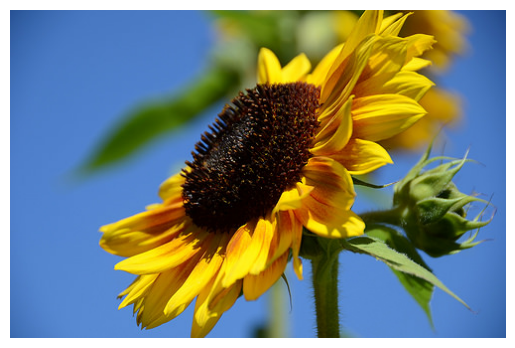

In [145]:
## Random image plotting for testing 

plt.imshow(tf.keras.preprocessing.image.load_img(np.random.choice(test_img)))
plt.axis('Off')
plt.show();

# Data Augmentation

In [146]:
INPUT_SHAPE = [224, 224]

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=.2,
    height_shift_range=.2,
    vertical_flip=True,
    rotation_range=.2,
    zoom_range=.2,
    shear_range=.2
)
train_path, test_path

('flowers/flowers/flower_photos/train', 'flowers/flowers/flower_photos/test')

In [147]:
batch_size = 64

train_gen = gen.flow_from_directory(
    train_path,    
    target_size=INPUT_SHAPE,
    batch_size=64,
    shuffle=True
)

test_gen = gen.flow_from_directory(
    test_path,
    target_size=INPUT_SHAPE,
    batch_size=batch_size
)

Found 3540 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


# Model Preparation

In [148]:
ptm = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE + [3],
    pooling='avg'
)
ptm.trainable = False

In [149]:
# Functional approach for model creation 
x = tf.keras.layers.Flatten()(ptm.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

In [150]:
model = tf.keras.models.Model(inputs=ptm.input, outputs=x)

In [151]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

# Model Compilation and training

In [152]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [155]:
r = model.fit(train_gen, validation_data=test_gen, steps_per_epoch=len(train_gen), validation_steps=len(test_gen), epochs=11)

Epoch 1/11
56/56 [==============================] - 73s 1s/step - loss: 0.2502 - accuracy: 0.9201 - val_loss: 1.7601 - val_accuracy: 0.7600
Epoch 2/11
56/56 [==============================] - 74s 1s/step - loss: 0.2711 - accuracy: 0.9201 - val_loss: 1.5344 - val_accuracy: 0.8200
Epoch 3/11
56/56 [==============================] - 74s 1s/step - loss: 0.2541 - accuracy: 0.9169 - val_loss: 1.4865 - val_accuracy: 0.7800
Epoch 4/11
56/56 [==============================] - 75s 1s/step - loss: 0.2134 - accuracy: 0.9347 - val_loss: 1.4075 - val_accuracy: 0.8000
Epoch 5/11
56/56 [==============================] - 77s 1s/step - loss: 0.2181 - accuracy: 0.9347 - val_loss: 1.6648 - val_accuracy: 0.8200
Epoch 6/11
56/56 [==============================] - 72s 1s/step - loss: 0.2682 - accuracy: 0.9198 - val_loss: 1.3437 - val_accuracy: 0.8200
Epoch 7/11
56/56 [==============================] - 71s 1s/step - loss: 0.3068 - accuracy: 0.9155 - val_loss: 1.4642 - val_accuracy: 0.8400
Epoch 8/11
56/56 [==